# Session 2 - Time series visualization
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes will be written and executed in Jupyter Notebook. Students will be provided with the databases to run the codes. Session 2 will focus on data visualization with time series.

### Session: 1 - July 17
### Time: 6pm- 8pm
### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- [1. Time series visualization](#t1)
  - [1.1. Plotting a time series](#t1.1)
  - [1.2. Preparing time series](#t1.2) 
  - [1.3. Exporting your graphs](#t1.3)
- [2. Customizing your time series plot](#t2)
  - [2.1. Plotting a subset of the time series](#t2.1)
  - [2.2. Adding lines to graphs](#t2.2)
  - [2.3. Shading regions on your graph](#t2.3)
  - [2.4. Adding annotations](#t2.4)
- [3. Plot data aggregates](#t3)
  - [3.1. Plotting the rolling average](#t3.1)
  - [3.2. Plotting aggregate data by year](#t3.2)
- [4. Plot summary statistics and synthesizing information](#t4)
  - [4.1. Summary statistics](#t4.1)
  - [4.2. Visualizing data distributions](#t4.2)
- [5. Decompose a time series](#t5)
- [6. Plot multiple time series](#t6)


In [1]:
import time
start = time.time()

#  <a id='t1'> 1. Time series visualization</a>

## <a id='1.1.'> 1.1. Plotting a time series </a>  


In [2]:
# We import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# We read our dataframe using read_csv()
co_2 = pd.read_csv('../data/co2_levels.csv', parse_dates=["datestamp"], index_col="datestamp")
co_2.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [4]:
co_2.index # Verify it is a DateTimeIndex

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

### ```.plot()```
The `.plot()` function in pandas is a convenient and powerful tool for visualizing time series data as line plots. It allows for easy creation of line graphs that plot data points over time. The function automatically handles datetime indexing and provides a range of customization options, such as setting the figure size, line style, color, and labels for the axes and title.


#### Main arguments for plotting

| Argument   | Description                                                             |
|------------|-------------------------------------------------------------------------|
| **figsize** | Size of the canvas (width x height)                                     |
| **fontsize** | Font size (can also be specified for the title or the x and y axes)    |
| **linewidth** | Thickness of the plot line                                            |
| **linestyle** | Style of the line (dotted, solid, etc.)                               |
| **color** | Color of the line                                                        |

#### Main functions for plotting

| Function     | Description                   |
|--------------|-------------------------------|
| **set_xlabel** | Name of the x-axis             |
| **set_ylabel** | Name of the y-axis             |
| **set_title**  | Title of the plot              |


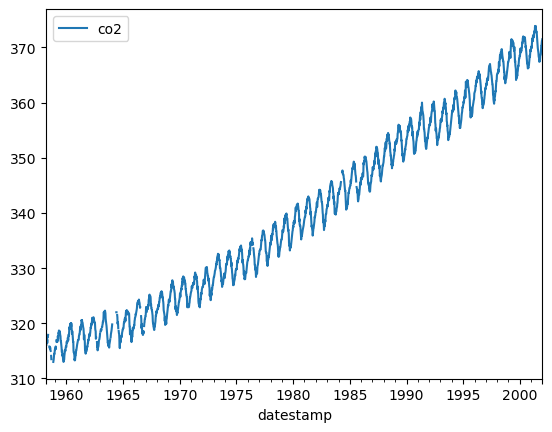

In [5]:
co_2.plot()
plt.show()

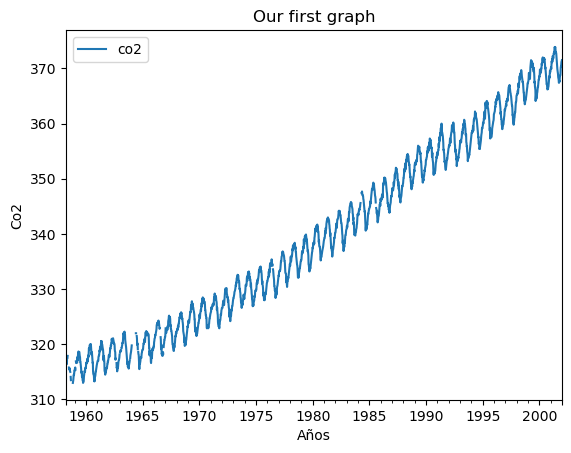

In [6]:
co_2.plot()

plt.xlabel('Años')

plt.ylabel('Co2')

plt.title('Our first graph')

plt.show()

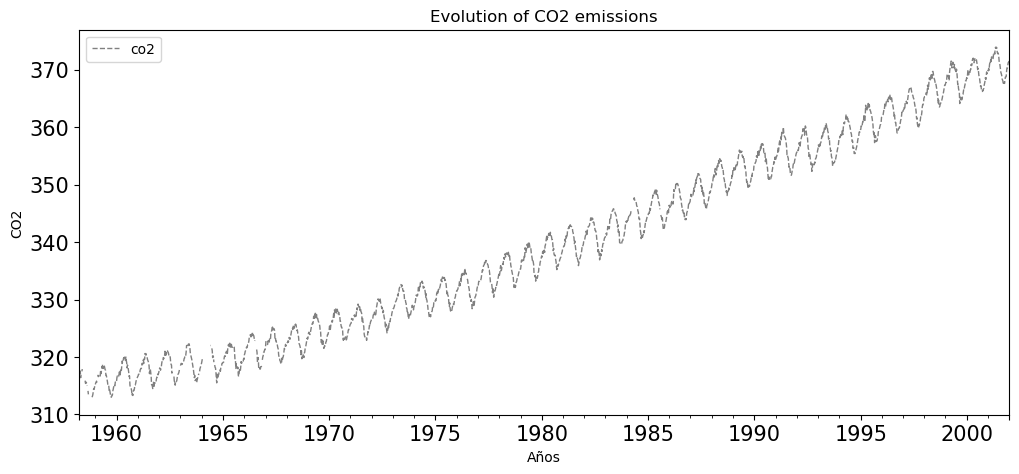

In [7]:
ax = co_2.plot(figsize = (12, 5), fontsize = 15, linewidth = 1, linestyle = '--', color = 'grey')

ax.set_xlabel('Años')

ax.set_ylabel('CO2')

ax.set_title('Evolution of CO2 emissions')

plt.show()

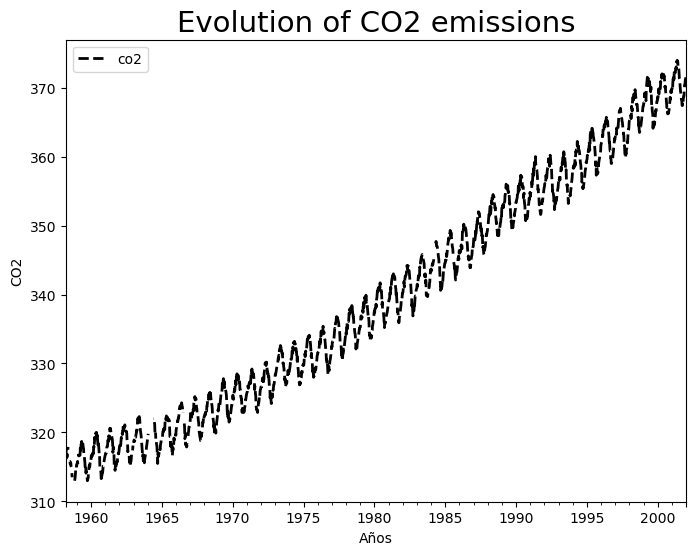

In [8]:
ax = co_2.plot(figsize = (8, 6), linewidth = 2, linestyle = '--', color = 'black')

ax.set_xlabel('Años', fontsize = 10)

ax.set_ylabel('CO2', fontsize = 10)

ax.set_title('Evolution of CO2 emissions', fontsize = 21)

plt.show()

### Personalizing your plot
#### Other important functions

| Function       | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| **grid**       | Add a grid to the background                                                          |
| **tick_params** | Adjust the appearance of ticks, tick labels, and grids. For example, the size of axis values or the rotation |

####  Other important arguments

| Argument      | Description                                                                             |
|---------------|-----------------------------------------------------------------------------------------|
| **labelsize** | The size of the tick                                                                     |
| **rotation**  | Allows the tick to rotate                                                                |
| **grid_alpha** | Indicates the transparency of the grid      

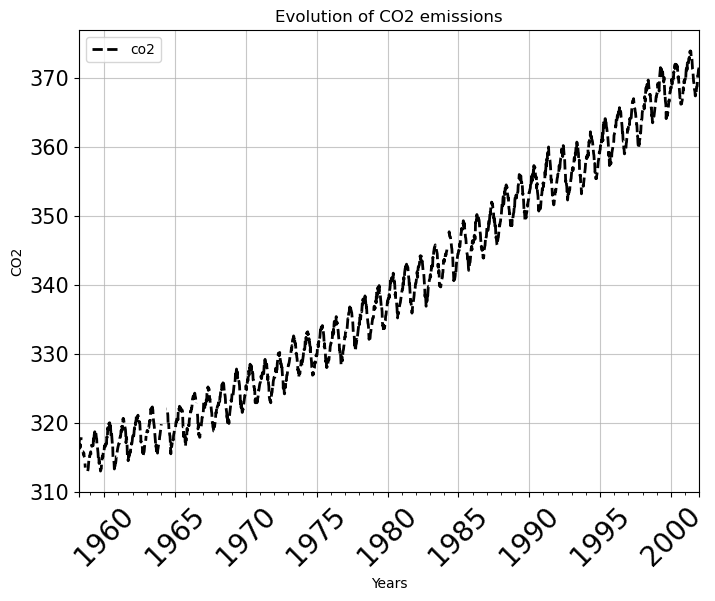

In [9]:
ax = co_2.plot(figsize = (8, 6), fontsize = 15, linewidth = 2, linestyle = '--', color = 'black')

ax.set_xlabel('Years', fontsize = 10)

ax.set_ylabel('CO2', fontsize = 10)

ax.set_title('Evolution of CO2 emissions')

ax.grid(True)

ax.tick_params(axis='x', labelsize=20,  rotation = 45, grid_alpha = 0.7) 

ax.tick_params(axis='y', labelsize=15, grid_alpha = 0.7)

plt.show()

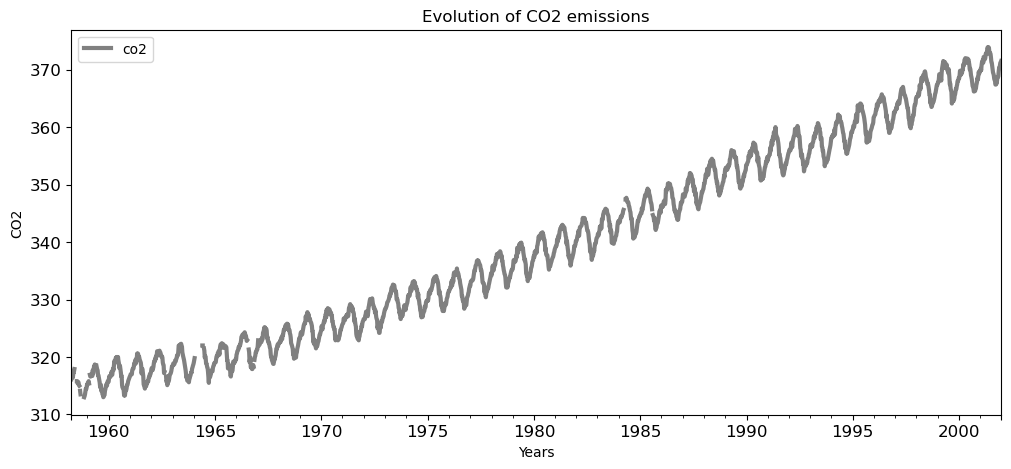

In [10]:
ax = co_2.plot(figsize = (12, 5), fontsize = 12, linewidth = 3, linestyle = '-', color = 'grey')

ax.set_xlabel('Years')

ax.set_ylabel('CO2')

ax.set_title('Evolution of CO2 emissions')

plt.show()

### ```plt.style.use()```
The plt.style.use() function in Matplotlib is used to apply a predefined style to your plots. This function allows you to quickly change the visual appearance of your plots by selecting a style that suits your needs or preferences. Matplotlib comes with several built-in styles, such as 'ggplot', 'seaborn', 'fivethirtyeight', and 'classic', among others. Using plt.style.use() helps standardize the look of your plots, making them more visually appealing and easier to interpret.

In [11]:
print(plt.style.available) # All available styles in matplotlib.pyplot

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


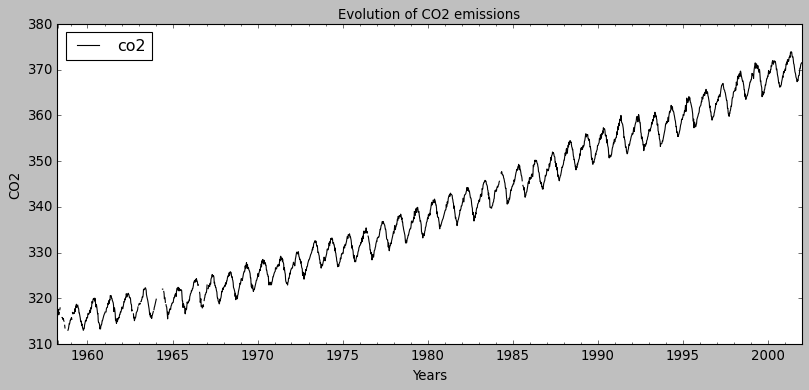

In [12]:
plt.style.use('classic')

ax = co_2.plot(figsize = (12, 5), linestyle = '-', color = 'black')

ax.set_xlabel('Years')
ax.set_ylabel('CO2')
ax.set_title('Evolution of CO2 emissions', fontsize = 12)
plt.show()

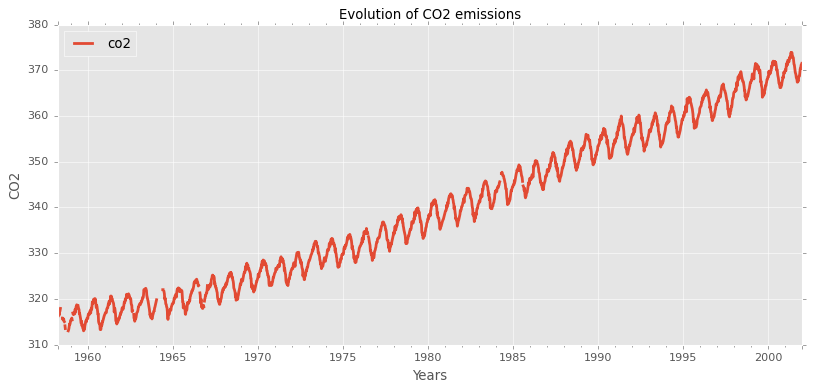

In [13]:
plt.style.use('ggplot') # Ahora luce como una gráfica de R

ax = co_2.plot(figsize = (12, 5), linewidth = 2.5)

ax.set_xlabel('Years')
ax.set_ylabel('CO2')
ax.set_title('Evolution of CO2 emissions', fontsize = 12)
plt.show()

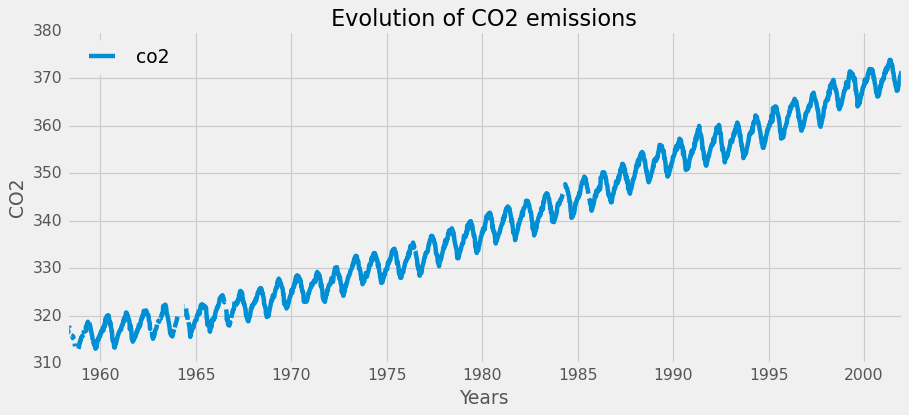

In [14]:
plt.style.use('fivethirtyeight') # usually used in presentations

ax = co_2.plot(figsize = (12, 5))

ax.set_xlabel('Years')
ax.set_ylabel('CO2')
ax.set_title('Evolution of CO2 emissions')
plt.show()

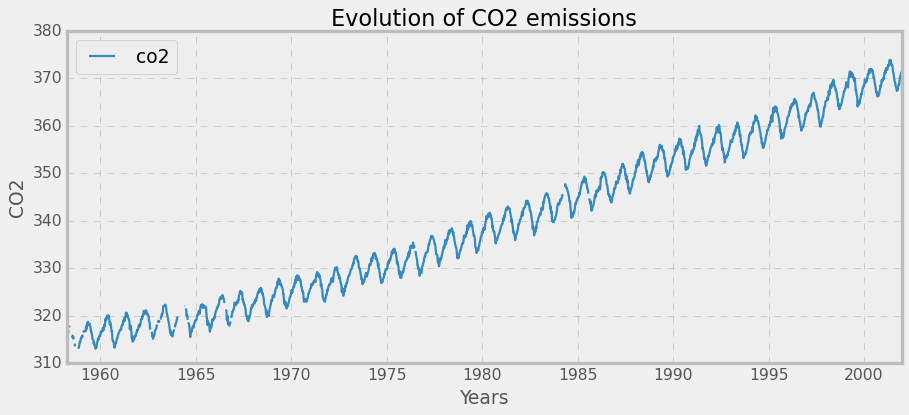

In [15]:
plt.style.use('bmh') # otro formato

ax = co_2.plot(figsize = (12, 5))

ax.set_xlabel('Years')
ax.set_ylabel('CO2')
ax.set_title('Evolution of CO2 emissions')
plt.show()

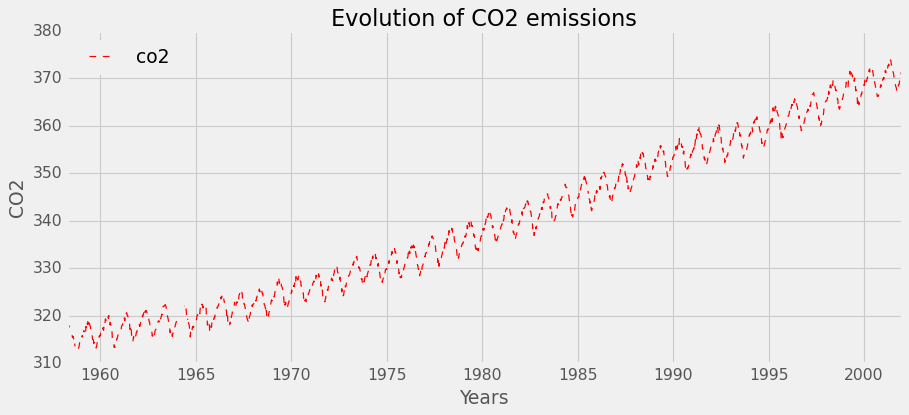

In [16]:
plt.style.use('fivethirtyeight') 

ax = co_2.plot(figsize = (12, 5), linewidth = 1.1, linestyle = '--', color = 'red')

ax.set_xlabel('Years')
ax.set_ylabel('CO2')
ax.set_title('Evolution of CO2 emissions')
plt.show()

In [17]:
plt.style.use('default') # We will be using the default version

More info:
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## <a id="t1.2"></a>1.2. Preparing your time series data

### ```.fillna()```
This function fills NA/NaN values using the specified method.

In [18]:
co_2.isna().sum() # We first check if we have missing values
co_2.isnull().sum()

co2    59
dtype: int64

In [19]:
co2_levels_bf = co_2.fillna(method='bfill') # backward fill: takes the previous value to fill in the missing value

In [20]:
co2_levels_ff = co_2.fillna(method='ffill') # forward fill: takes the following value to fill in the missing value

In [21]:
co2_levels_ff.isna().sum()

co2    0
dtype: int64

<AxesSubplot:xlabel='datestamp'>

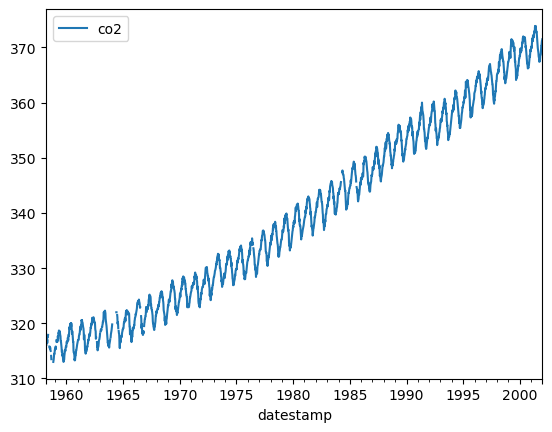

In [22]:
co_2.plot()

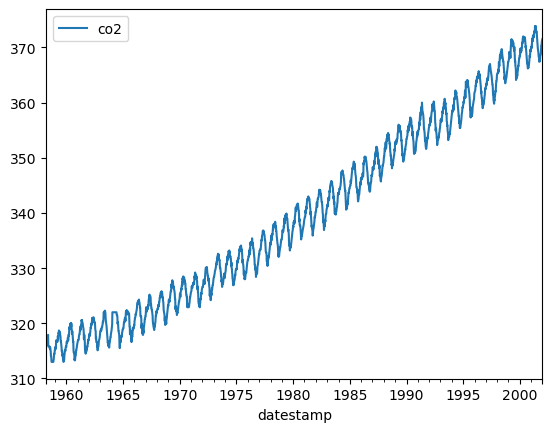

In [23]:
co2_levels_bf.plot()
plt.show()

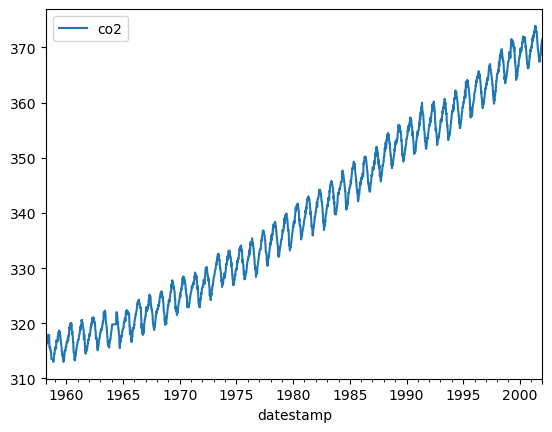

In [24]:
co2_levels_ff.plot()
plt.show()

## <a id="t1.3"></a>1.3. Exporting your graphs

### ```.savefig()```
The `savefig()` function in Matplotlib is used to save the current figure to a file, offering various customization options. Key arguments include `fname` for the file name, dpi for setting the resolution, `bbox_inches` to control the saved figure's portion (with 'tight' ensuring all elements are included), `format` to specify the file format, and `transparent` to make the background transparent.

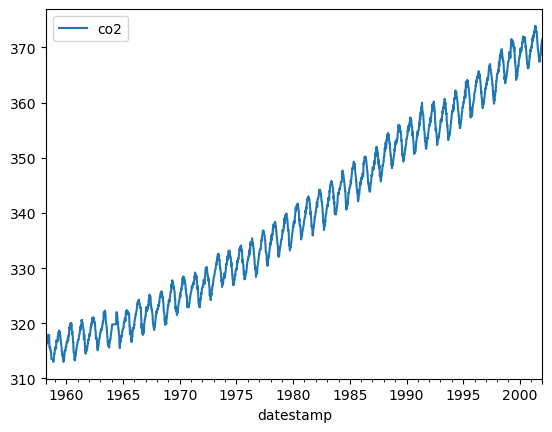

In [25]:
co2_levels_ff.plot()

plt.savefig("../images/CPI and CBI for Chile.png", dpi=300, bbox_inches='tight', transparent=False)

plt.show()

#  <a id='t2'> 2. Customizing your time series plot</a> 

## <a id="t2.1"></a>2.1. Plotting a subset of the time series

We will first inspect our new dataframe before plotting it and custimizing our plot

In [26]:
discoveries = pd.read_csv('../data/discoveries.csv')

In [27]:
print(discoveries.columns)
print(discoveries.dtypes)

Index(['date', 'Y'], dtype='object')
date    object
Y        int64
dtype: object


In [28]:
discoveries['date'] = pd.to_datetime(discoveries['date'])  # Colocamos date

In [29]:
discoveries = discoveries.set_index('date') # Colocamos date

In [30]:
print(discoveries.index)

DatetimeIndex(['1860-01-01', '1861-01-01', '1862-01-01', '1863-01-01',
               '1864-01-01', '1865-01-01', '1866-01-01', '1867-01-01',
               '1868-01-01', '1869-01-01', '1870-01-01', '1871-01-01',
               '1872-01-01', '1873-01-01', '1874-01-01', '1875-01-01',
               '1876-01-01', '1877-01-01', '1878-01-01', '1879-01-01',
               '1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01', '1890-01-01', '1891-01-01',
               '1892-01-01', '1893-01-01', '1894-01-01', '1895-01-01',
               '1896-01-01', '1897-01-01', '1898-01-01', '1899-01-01',
               '1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01',
               '1904-01-01', '1905-01-01', '1906-01-01', '1907-01-01',
               '1908-01-01', '1909-01-01', '1910-01-01', '1911-01-01',
               '1912-01-01', '1913-01-01', '1914-01-01', '1915-01-01',
      

In [31]:
discoveries.head()

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0


In [32]:
# Does it has missing values?
discoveries.isna().sum()

Y    0
dtype: int64

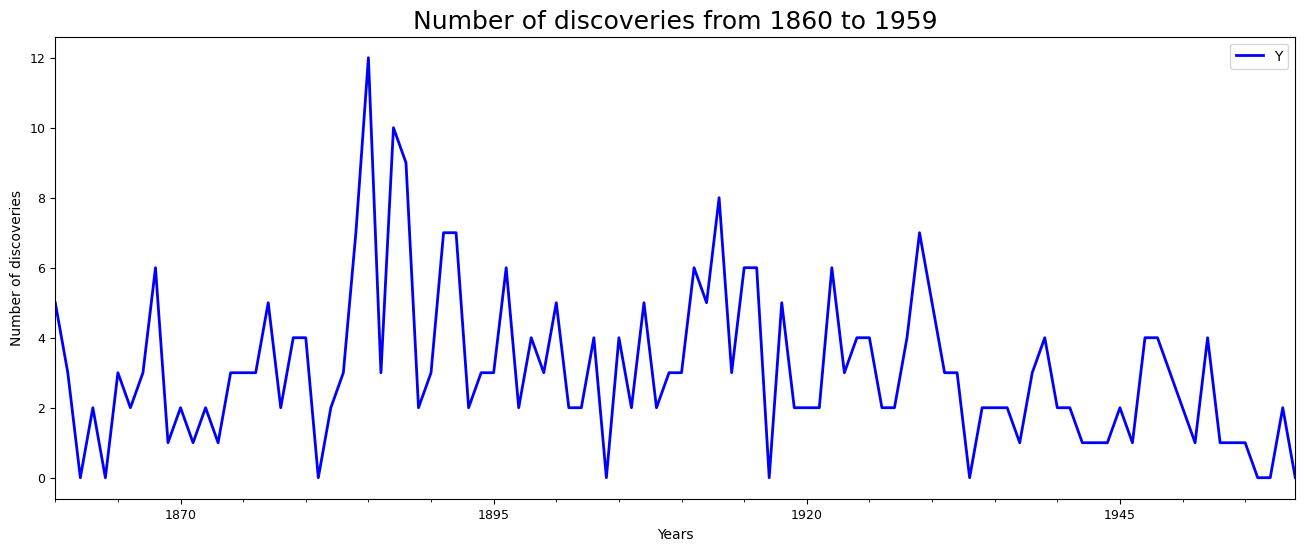

In [33]:
plt.style.use('default')

ax = discoveries.plot(color='blue', figsize=(16, 6), linewidth=2, fontsize=9)

ax.set_xlabel('Years')

ax.set_ylabel('Number of discoveries')

ax.set_title('Number of discoveries from 1860 to 1959', fontsize='18')

plt.show()

In [34]:
early_twentieth_century = discoveries['1900':'1945']

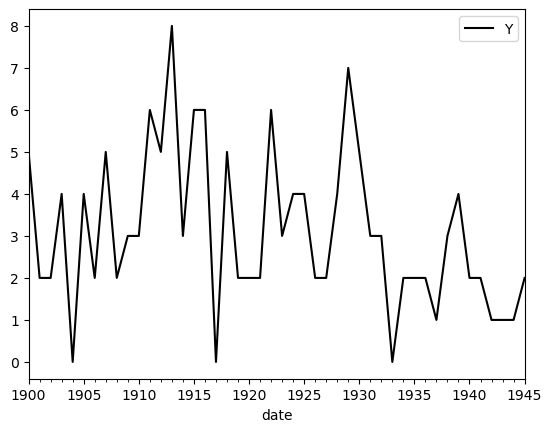

In [35]:
early_twentieth_century.plot(color = 'black')
plt.show()

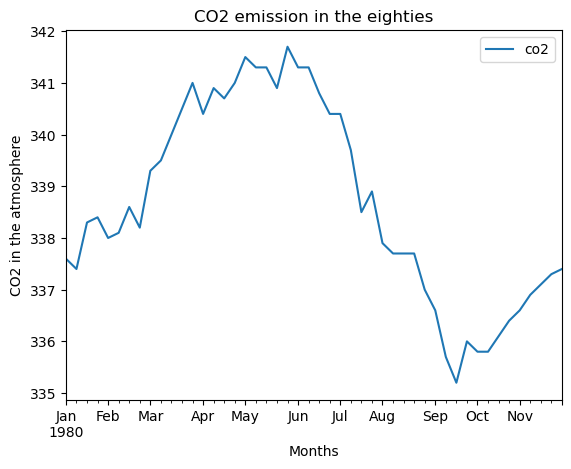

In [36]:
nineteen_eighty = co_2['1980-01-01':'1980-12-01'] # We subset the year 1980

ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('CO2 in the atmosphere')

ax.set_title('CO2 emission in the eighties')

plt.show()

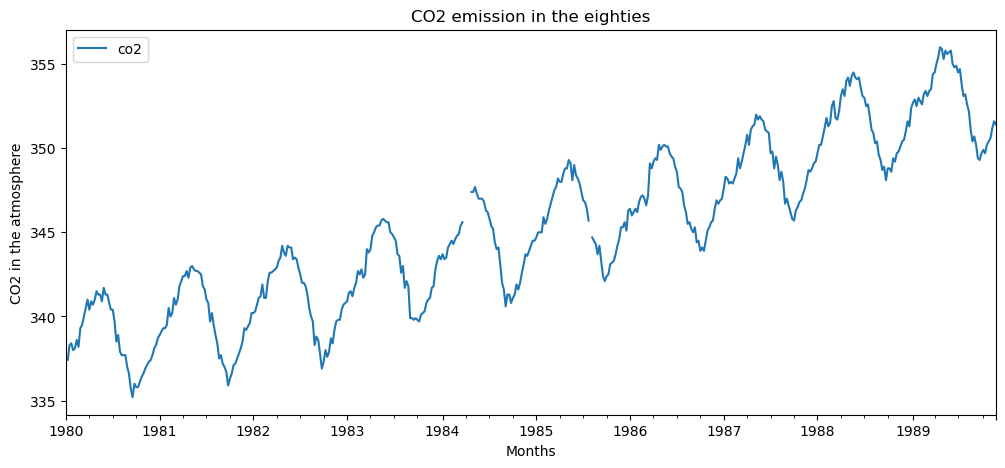

In [37]:
eighties = co_2['1980-01-01':'1989-12-01'] # Make a subset of the eighties

ax = eighties.plot(figsize=(12,5)) # Adjust the canvas size

ax.set_xlabel('Months')

ax.set_ylabel('CO2 in the atmosphere')

ax.set_title('CO2 emission in the eighties')

plt.show()

## <a id="t2.2"></a>2.2. Adding lines to graphs

### ```.axvline()```
The `axvline()` function in Matplotlib adds a vertical line across the axes at a specified x-coordinate. It's useful for highlighting significant values or events in your plot. The line spans the height of the plot, making it a convenient tool for emphasizing specific points along the x-axis.

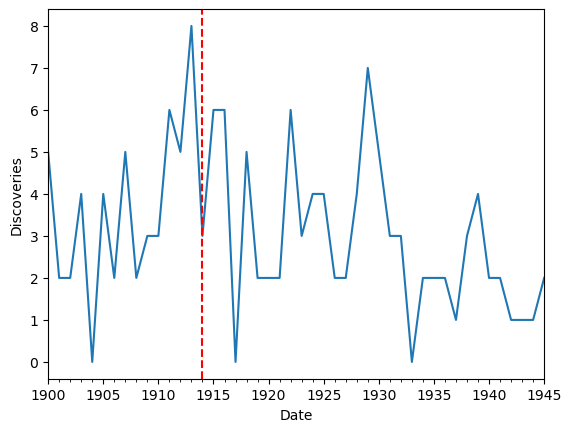

In [38]:
# Utilizamos axvline 
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Date')

ax.set_ylabel('Discoveries')

ax.axvline(x = '1914-01-01', color = 'red', linestyle = '--') # Podemos indicar eventos importantes

plt.show()

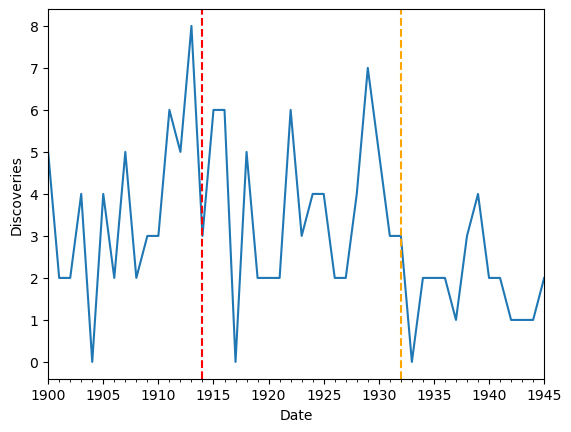

In [39]:
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Date')

ax.set_ylabel('Discoveries')

ax.axvline(x = '1914-01-01', color = 'red', linestyle = '--') # Indicamos una fecha histórica

ax.axvline(x = '1932-01-01', color = 'orange', linestyle = '--') # Podemos indicar varias líneas en una sola gráfica

plt.show()

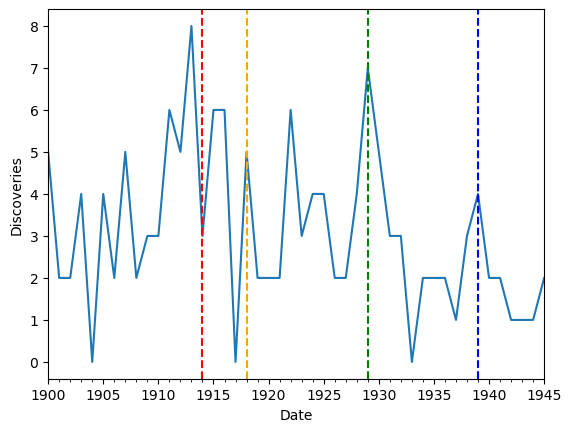

In [40]:
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Date')

ax.set_ylabel('Discoveries')

historic_dates = ['1914-01-01', '1918-01-01', '1929-01-01', '1939-01-01']

colors = ['red', 'orange', 'green', 'blue']

for date, color in zip(historic_dates, colors): 
    ax.axvline(x=date, color=color, linestyle='--') 

plt.show()

### ```.axhline()```
The `axhline()` function in Matplotlib adds a horizontal line across the axes at a specified y-coordinate. It's useful for highlighting specific y-values, such as thresholds, baselines or minimum values across the width of the plot.

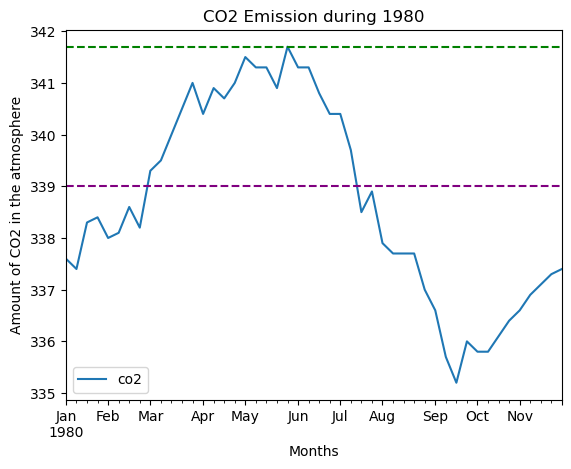

In [41]:
co2_levels = co_2.fillna(method='ffill')

nineteen_eighty = co2_levels['1980-01-01':'1980-12-01']

ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhline(y = 339, color = 'purple', linestyle = '--')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

plt.show()


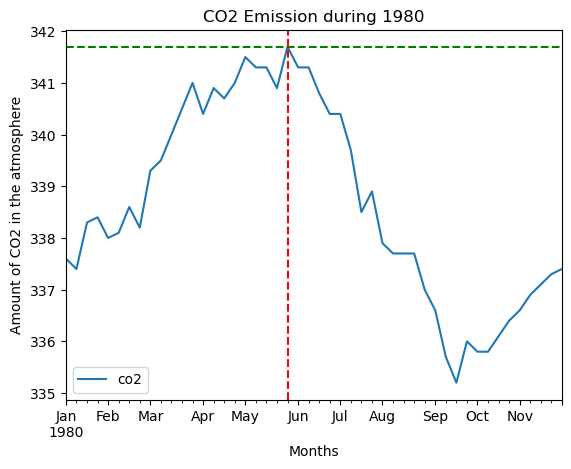

In [42]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

ax.axvline(x = '1980-05-31', color = 'red', linestyle = '--')

plt.show()


In [43]:
print(nineteen_eighty.min())
nineteen_eighty[nineteen_eighty['co2'] == 335.2]

co2    335.2
dtype: float64


,co2
datestamp,
1980-09-20,335.2


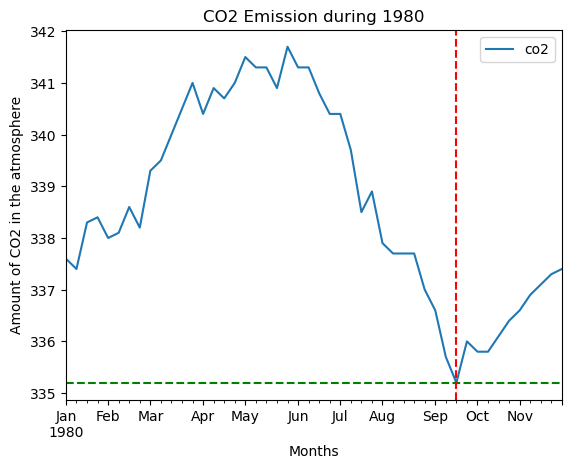

In [44]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhline(y = 335.2, color = 'green', linestyle = '--')

ax.axvline(x = '1980-09-20', color = 'red', linestyle = '--')

plt.show()

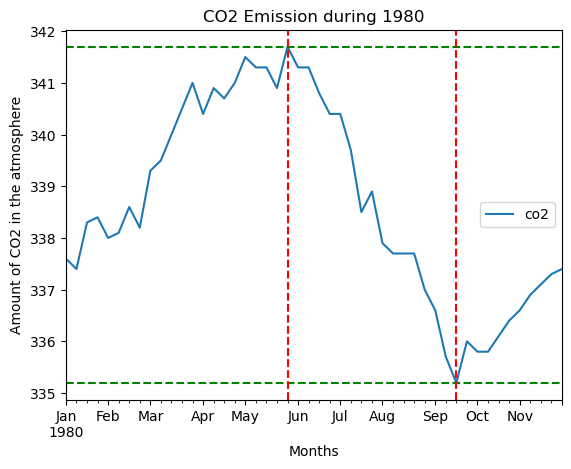

In [45]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

ax.axhline(y = 335.2, color = 'green', linestyle = '--')

ax.axvline(x = '1980-05-31', color = 'red', linestyle = '--')  # year 1980-05-31

ax.axvline(x = '1980-09-20', color = 'red', linestyle = '--')  # year 1980-09-20

plt.show()

## <a id="t2.3"></a>2.3. Shading regions on your graph

### ```.axvspan()```
The `axvspan()` function in Matplotlib is used to add a vertical span (rectangle) across the axis of a plot. It highlights a specific range of values on the x-axis. The span extends horizontally between the specified x-values, and vertically across the full y-axis range (or a specified portion if limits are set)

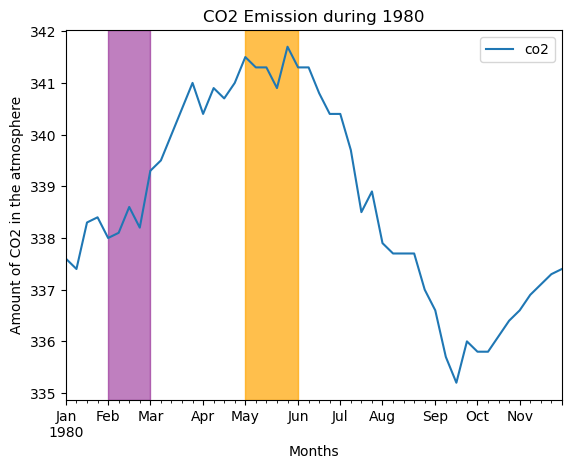

In [46]:
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axvspan('1980-02-01', '1980-03-01', color = 'purple', alpha = 0.5)

ax.axvspan('1980-05-01', '1980-06-01', color='orange', alpha=0.7)


plt.show()

### ```.axhspan()```
The `axhspan()` function in Matplotlib is used to add a horizontal span (rectangle) across the axis of a plot. It highlights a specific range of values on the y-axis. The span extends vertically between the specified y-values, and horizontally across the full x-axis range (or a specified portion if limits are set).

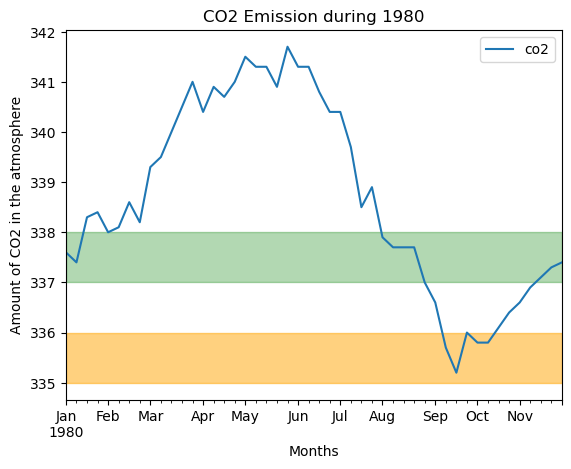

In [47]:
# We can also highlight horizontally from one value to another
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhspan(ymin=335, ymax=336, color = 'orange', alpha = 0.5)

ax.axhspan(338, 337, color = 'green', alpha = 0.3) 

plt.show()

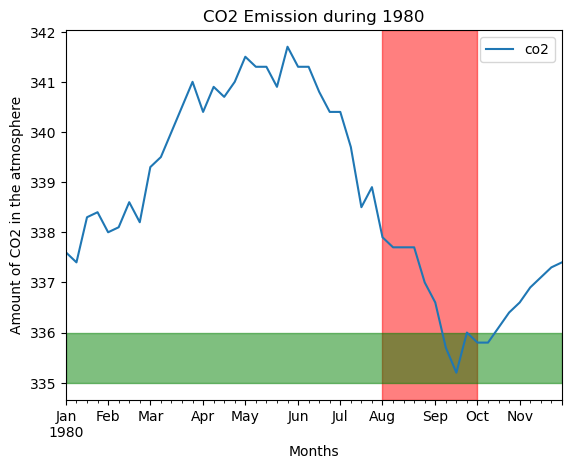

In [48]:
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axvspan('1980-08-01', '1980-10-01', color = 'red', alpha = 0.5)

ax.axhspan(335, 336, color = 'green', alpha = 0.5)

plt.show()

## <a id="t2.4"></a>2.4. Adding annotations

### ```.annotate()```
The `annotate()` function in Matplotlib is used to create annotations or text labels at specified coordinates in the plot. Annotations are often used to highlight specific points or features of interest on the plot.

In [49]:
mean_nineteen_eighty = nineteen_eighty.mean() # Let's leave a note indicating the mean value

In [50]:
mean_nineteen_eighty.iloc[0]

338.68333333333334

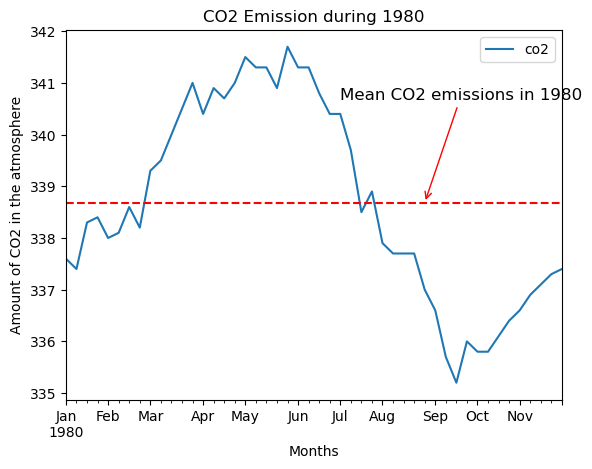

In [51]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhline(y = mean_nineteen_eighty.iloc[0], color = 'red', linestyle = '--') 

ax.annotate('Mean CO2 emissions in 1980', xy=('1980-08-30', mean_nineteen_eighty.iloc[0]),
            xytext=('1980-06-30', mean_nineteen_eighty.iloc[0] + 2), fontsize=12,
            color='black', arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

In [52]:
min_nineteen_eighty = nineteen_eighty.min()
nineteen_eighty[nineteen_eighty['co2'] == min_nineteen_eighty.iloc[0]]

,co2
datestamp,
1980-09-20,335.2


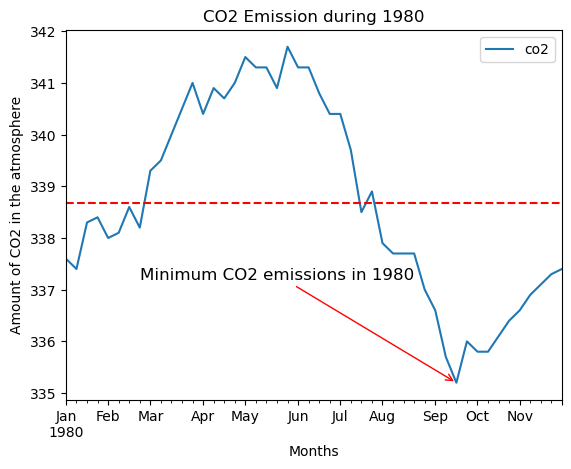

In [53]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Months')

ax.set_ylabel('Amount of CO2 in the atmosphere')

ax.set_title('CO2 Emission during 1980')

ax.axhline(y = mean_nineteen_eighty.iloc[0], color = 'red', linestyle = '--') 

ax.annotate('Minimum CO2 emissions in 1980', xy=('1980-09-20', min_nineteen_eighty.iloc[0]),
            xytext=('1980-02-20', min_nineteen_eighty.iloc[0] + 2), fontsize=12,
            color='black', arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

# <a id="t3"></a>3. Plot data aggregates

## <a id="t3.1"></a>3.1. Plotting the rolling average

### ```.rolling()```

The .rolling() method in pandas is used to create a rolling window calculation over a series or dataframe. It allows you to perform calculations such as mean, sum, min, max, standard deviation, etc., over a specified window of data points. This technique, often referred to as a rolling window or moving average, is fundamental in time series analysis for various purposes:

- Smoothing Data: By calculating rolling means or other statistics, short-term fluctuations in data can be smoothed out, making underlying trends more apparent.

- Handling Outliers: It helps in identifying and possibly mitigating the impact of outliers by averaging values over a window, which can reduce their influence on overall trends and patterns.

- Revealing Long-Term Trends: Long-term trends in data can be highlighted by averaging data points over larger windows, providing insights into the broader movements or changes in a dataset over time

| Argument       | Description                                                                                                                                              | Example                                         |
|----------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------|
| `window`       | Size of the moving window, specifying the number of periods (or data points) over which to perform the operation.                                        | `df['Value'].rolling(window=30).mean()`               |
| `min_periods`  | Minimum number of observations required in the window to have a valid result. Default is `None`, requiring all elements to have data.                     | `df['Value'].rolling(window=30, min_periods=20).std()`|
| `center`       | Whether the window should be centered on the data point (True) or use the right edge of the window (False). Default is `False`.                         | `df['Value'].rolling(window=30, center=True).mean()`  |
| `win_type`     | Type of window function used. Examples include `'boxcar'`, `'triang'`, `'gaussian'`, etc. Default is `None` (equal weight).                              | `df.rolling(window=30, win_type='gaussian').sum()`    |
| `on`           | For DataFrame, the column name to use when performing operations.                                                                                        | `df.rolling(window=30, on='Date').mean()`             |
| `axis`         | Axis along which the rolling window will be computed. Default is `0` (along rows).                                                                       | `df.rolling(window=30, axis=1).sum()`                 |


In [54]:
co2_mean = co2_levels.rolling(window = 52).mean() 

co2_mean will provide a series where each value is the average CO2 level over the previous 52 weeks (approximately one year), revealing longer-term changes in CO2 concentrations. By plotting the moving average we can see the long-term cycle or trend of the time series

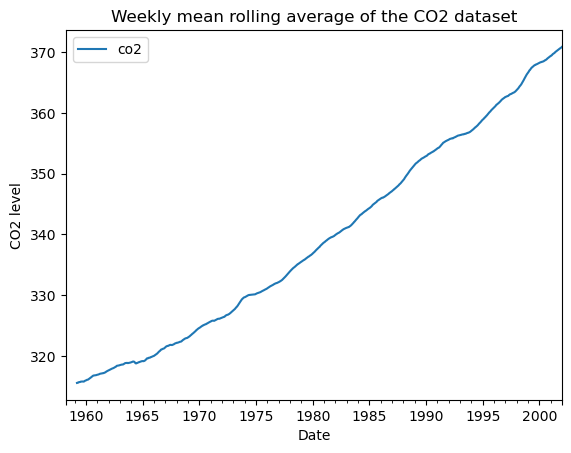

In [55]:
ax = co2_mean.plot()

ax.set_xlabel('Date')

ax.set_ylabel('CO2 level')

ax.set_title('Weekly mean rolling average of the CO2 dataset')

plt.show()

The moving average is useful for smoothing data fluctuations and gaining a clearer view of the overall trend. It is particularly effective for identifying long-term patterns and reducing noise in time series data, especially when the series contains a lot of noise or outliers.

The `window` parameter should be set based on the disaggregation of the time series. For example, if the series contains daily data and you want to compute moving averages over an entire year, you should specify `window=365`. Additionally, it's straightforward to obtain moving values for other metrics, such as standard deviation (`.std()`) or variance (`.var()`).

In [56]:
ma = co2_levels.rolling(window = 52).mean() # Compute the moving averahe of 52 weeks 

mstd = co2_levels.rolling(window=52).std() # Compute the std of 52 weeks

In [57]:
# We create an upper threshold
ma['upper'] = ma['co2'] + (2 * mstd['co2'])  # mean + (2 * rolling standard deviation)

# We create a lower threshold
ma['lower'] = ma['co2'] - (2 * mstd['co2']) # mean - (2 * rolling standard deviation)

In [58]:
ma

,co2,upper,lower
datestamp,,,
1958-03-29,NaN,NaN,NaN
1958-04-05,NaN,NaN,NaN
1958-04-12,NaN,NaN,NaN
1958-04-19,NaN,NaN,NaN
1958-04-26,NaN,NaN,NaN
...,...,...,...
2001-12-01,370.738462,374.602860,366.874063
2001-12-08,370.761538,374.612518,366.910559
2001-12-15,370.798077,374.628500,366.967654


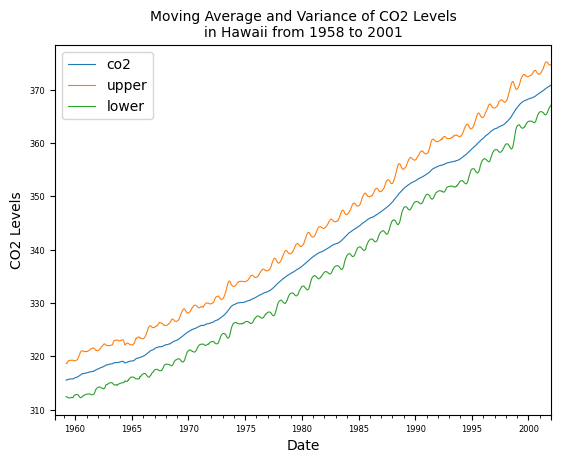

In [59]:
ax = ma.plot(linewidth=0.8, fontsize=6)

ax.set_xlabel('Date', fontsize=10)

ax.set_ylabel('CO2 Levels', fontsize=10)

ax.set_title('Moving Average and Variance of CO2 Levels\nin Hawaii from 1958 to 2001', fontsize=10)

plt.show()

## <a id="t3.2"></a>3.2. Plotting aggregate data by year

Sometimes, we may want to aggregate time series data into smaller subsets to obtain more detailed information or identify seasonal patterns. After grouping the monthly data and calculating the average CO2 for each month, we generate a graph that clearly shows the seasonal trend in CO2 levels throughout the year.

In [60]:
index_month = co2_levels.index.month # We obtain the month index
index_month 

Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)

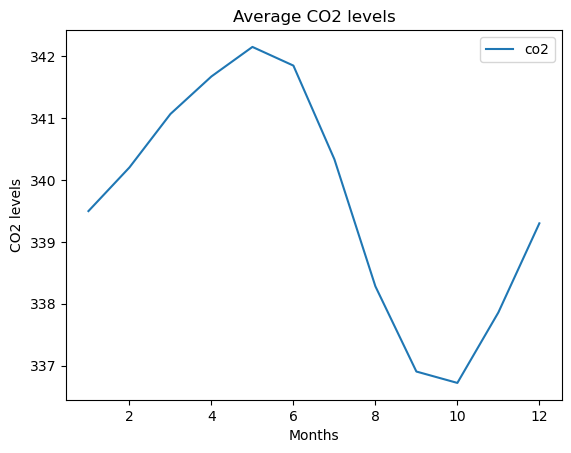

In [61]:
co2_levels_by_month = co2_levels.groupby(index_month).mean() # We group by month before plotting

co2_levels_by_month.plot()

plt.title('Average CO2 levels')

plt.ylabel('CO2 levels')

plt.xlabel('Months')

plt.show()

# We obtain a smooth 1980s graph

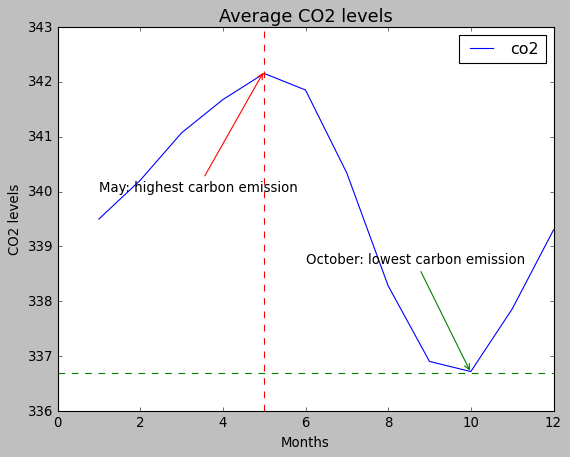

In [62]:
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

plt.style.use('classic')

co2_levels_by_month.plot(figsize=(8, 6))

plt.title('Average CO2 levels', fontsize=16)

plt.ylabel('CO2 levels')

plt.xlabel('Months')

plt.axvline(x=5, linestyle='--', color='red')

plt.annotate('October: lowest carbon emission', xy=(10, 336.7),
             xytext=(6, 338.6833), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate('May: highest carbon emission', xy=(5, 342.2),
             xytext=(1, 340), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='red'))

plt.axhline(y=336.7, linestyle='--', color='green')

plt.show()

# <a id="t4"></a>4. Plot summary statistics and synthesizing information
While plotting and annotating time series data is useful for sharing information, it is equally important to gather statistics on the time series being analyzed. Collecting these statistics allows for a deeper understanding of the data's properties, which can support the visualizations and the hypotheses we aim to communicate. This combination of statistical analysis and visual representation strengthens the overall interpretation and discussion of the data.

## <a id="t4.1"></a>4.1. Summary statistics

### ```.describe()```
The `describe()` function in pandas provides a summary of statistical metrics for a DataFrame or Series. It includes measures such as count, mean, standard deviation, min, max, and percentiles (25%, 50%, 75%), offering a quick overview of the data's distribution and central tendencies.

In [63]:
co_2.describe() # Principales estadísticas del dataframe

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [64]:
co2_levels.describe()

,co2
count,2284.000000
mean,339.647242
std,17.106905
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


In [65]:
discoveries.describe()

,Y
count,100.000000
mean,3.100000
std,2.254065
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [66]:
print(co2_levels.describe())

               co2
count  2284.000000
mean    339.647242
std      17.106905
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


### Specific summary statistics ```.min()``` ```.max()``` ```.std()```
We can obtain specific statistics such as the minimum value using `.min()`, the maximum value with `.max()`, the `.mean()` value and the standard deviation with `.std()`. These functions allow us to analyze the data's range and variability, providing insights into its distribution and spread.

In [67]:
co2_levels.mean()

co2    339.647242
dtype: float64

In [68]:
co2_levels.std()

co2    17.106905
dtype: float64

In [69]:
print(co2_levels.min())

co2    313.0
dtype: float64


In [70]:
print(co2_levels.max())

co2    373.9
dtype: float64


## <a id="t4.2"></a>4.2 Visualizing Data Distributions

In [71]:
import seaborn as sns # We import seaborn

### ```.boxplot()```
The `boxplot()` function in pandas creates a box-and-whisker plot, which is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. This plot helps in visualizing the spread and skewness of the data, and it also identifies outliers.

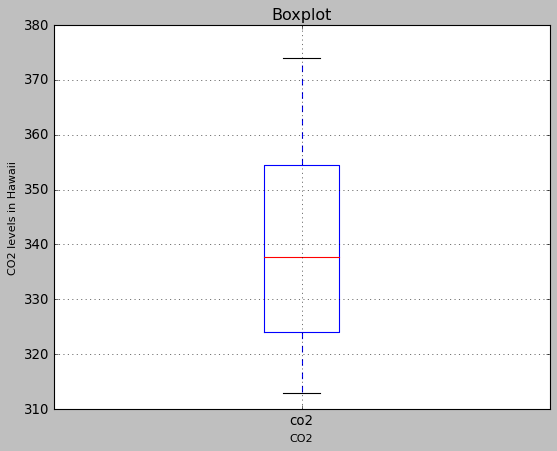

In [72]:
plt.style.use('classic')

ax = co2_levels.boxplot()

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('CO2 levels in Hawaii', fontsize=10)
ax.set_title('Boxplot')
plt.show()

The boxplot highlights key features such as the median, quartiles, and outliers. The lines extending from the boxes are commonly referred to as "whiskers," and they indicate the variability outside the upper quartile (75th percentile) and lower quartile (25th percentile), marking the range of outliers.

Text(0.5, 1.0, 'Boxplot')

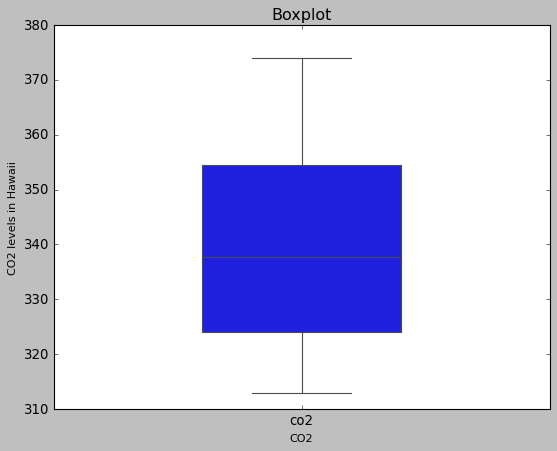

In [73]:
plt.figure(figsize=(8, 6))

sns.boxplot(data = co2_levels, width=0.4)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('CO2 levels in Hawaii', fontsize=10)

plt.title('Boxplot')

### ```histograms```
Histograms are an effective visual representation of data distribution within a dataset, allowing for quick identification of value concentrations across different intervals or "bins". By displaying the frequency of values occurring in each bin, histograms highlight the central tendency of the data and the overall shape of its distribution, whether it is symmetrical, skewed, or multimodal.

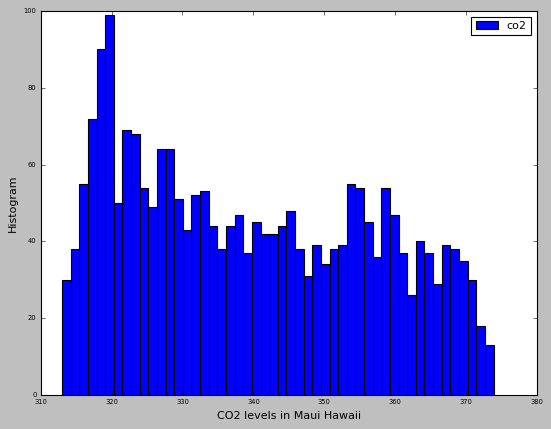

In [74]:
ax = co2_levels.plot(kind='hist', bins = 50, fontsize=6)

ax.set_xlabel('CO2 levels in Maui Hawaii', fontsize=10)
ax.set_ylabel('Histogram', fontsize=10)
plt.legend(fontsize=10)
plt.show()

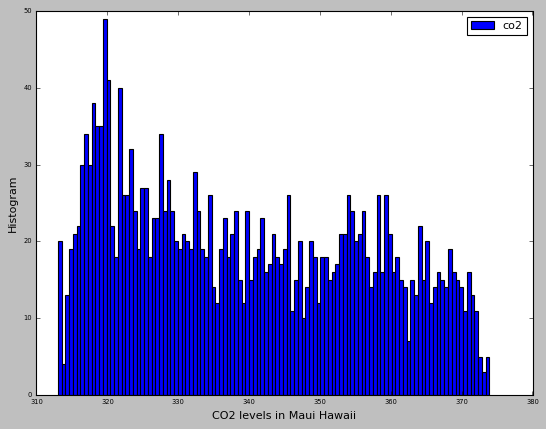

In [75]:
ax = co2_levels.plot(kind='hist', bins = 115, fontsize=6)

ax.set_xlabel('CO2 levels in Maui Hawaii', fontsize=10)
ax.set_ylabel('Histogram', fontsize=10)
plt.legend(fontsize=10)
plt.show()

### ```.histplot()```

| Argument    | Description                                                                                                                                  |
|-------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| `data`      | The input data for the histogram. This can be a list, NumPy array, pandas Series, or DataFrame column.                                        |
| `bins`      | Specifies the number of bins to divide the data range into. This can be an integer or a sequence defining the bin edges.                      |
| `kde`       | A boolean value that determines whether to overlay a kernel density estimate (KDE) on the histogram. Default is `False`.                       |
| `color`     | The color of the histogram bars and the KDE line. Accepts any Matplotlib color specification.                                                  |
| `stat`      | Defines the statistic to compute for the bins. Options include 'count' (default), 'density', 'probability', etc.                              |
| `element`   | Determines how to draw the bars: `'bars'` for traditional histogram bars, `'step'` for a line plot, or `'poly'` for a filled polygon.         |
| `fill`      | A boolean value that determines whether to fill the bars. Relevant when `element` is `'step'` or `'poly'`. Default is `True`.                 |
| `discrete`  | A boolean value that treats the data as discrete instead of continuous. Default is `False`.                                                   |
| `cumulative` | A boolean value that computes the cumulative distribution. Default is `False`.                                                               |



Text(0.5, 1.0, 'Boxplot')

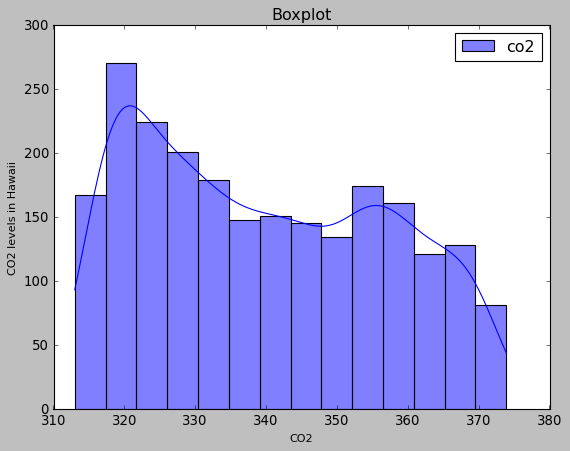

In [76]:
plt.figure(figsize=(8, 6))

sns.histplot(data = co2_levels, kde=True)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('CO2 levels in Hawaii', fontsize=10)

plt.title('Boxplot')

### ```density plots```
Density plots offer a detailed perspective of data distribution by visualizing the concentration of values along a continuous variable. They allow us to observe central tendencies and distribution shapes with greater smoothness and precision than histograms. By presenting the probability density of the data, density plots highlight the presence of multiple modes or peaks, the symmetry or asymmetry in the distribution, and areas of high data concentration.

Text(0.5, 1.0, 'Boxplot')

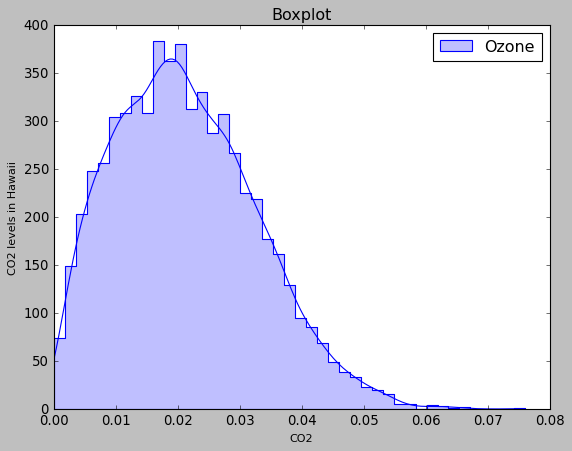

In [77]:
ozone_ny = pd.read_csv('../data/ozone_nyc.csv', delimiter = ",", parse_dates=["date"], index_col="date")

plt.figure(figsize=(8, 6))

sns.histplot(data = ozone_ny, element = 'step', kde = True)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('CO2 levels in Hawaii', fontsize=10)

plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

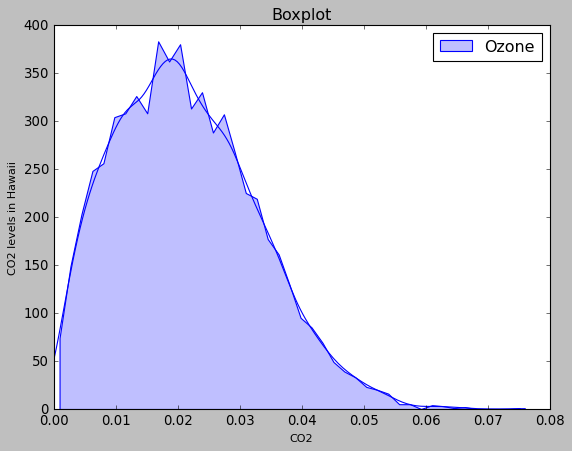

In [78]:
plt.figure(figsize=(8, 6))

sns.histplot(data = ozone_ny, element = 'poly', kde = True)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('CO2 levels in Hawaii', fontsize=10)

plt.title('Boxplot')

Text(0.5, 1.0, 'Cummulative distribution')

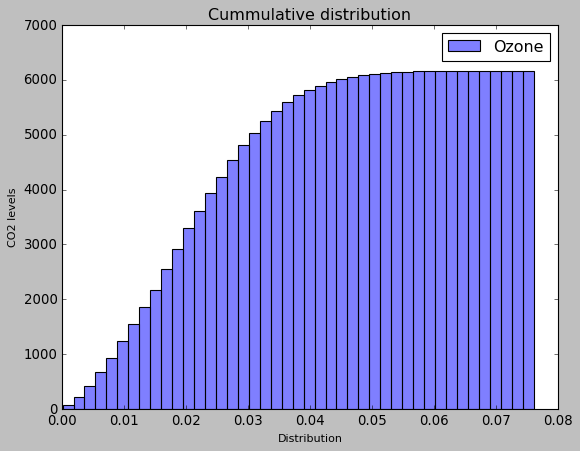

In [79]:
plt.figure(figsize=(8, 6))

sns.histplot(data = ozone_ny, cumulative = True)

plt.xlabel('Distribution', fontsize=10)

plt.ylabel('CO2 levels', fontsize=10)

plt.title('Cummulative distribution')

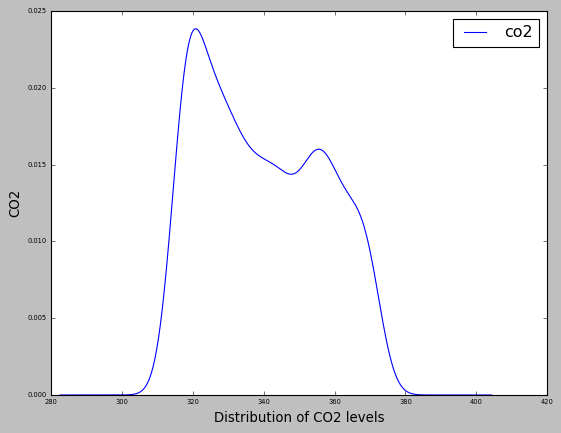

In [80]:
ax = co2_levels.plot(kind='density', linewidth = 1, fontsize = 6)

ax.set_xlabel('Distribution of CO2 levels')

ax.set_ylabel('CO2')

plt.show()

# <a id="t5"></a>5. Decompose a time series
Time series are usually decomposed into a seasonal component, a trend component, and an irregular (noise) component. Previously, we discussed ways to separate the long-term trend using a rolling window or by plotting the seasonal component by aggregating data by year. Now, we will explore another method to decompose the series into these three parts.

"Seasonality" refers to cyclic and recurring patterns in the data, which may be due to seasonal factors such as the time of year or regular events. The "trend" shows the overall direction of the data over time, revealing whether values tend to increase or decrease over time. Finally, "noise" represents random or irregular variability that cannot be attributed to seasonality or trend and is often considered a random component in the data.


In [81]:
import statsmodels.api as sm # We import statsmodels

### ```.seasonal_decompose()```
The `.seasonal_decompose()` function in statsmodels decomposes a time series into its seasonal, trend, and residual (noise) components. This method helps in analyzing the underlying patterns in the data.

$$y_t = t_t + c_t + s_t + e_t$$

In [82]:
descomposition = sm.tsa.seasonal_decompose(co2_levels)

In [83]:
print(dir(descomposition))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_observed', '_resid', '_seasonal', '_trend', '_weights', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend', 'weights']


In [84]:
descomp_trend = descomposition.trend

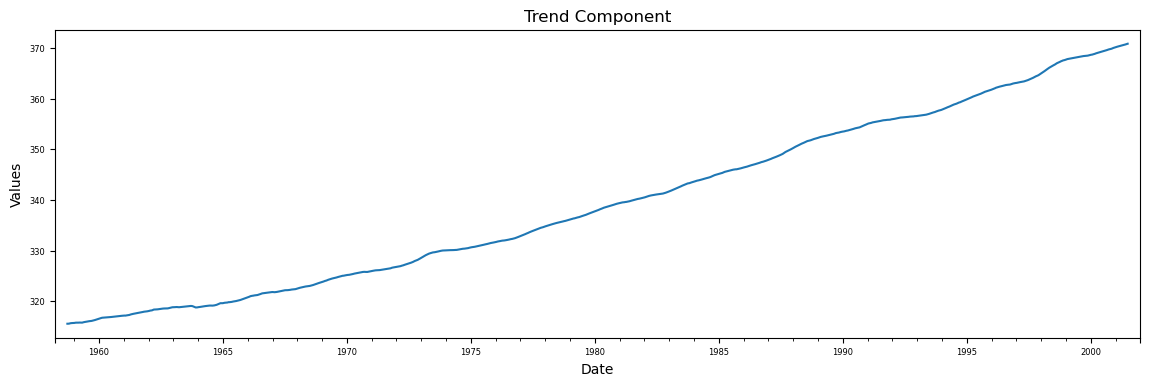

In [85]:
plt.style.use('default')

ax = descomp_trend.plot(figsize = (14,4), fontsize=6)

ax.set_xlabel('Date')

ax.set_ylabel('Values')

ax.set_title('Trend Component')

plt.show()

In [86]:
descomp_seasonal = descomposition.seasonal

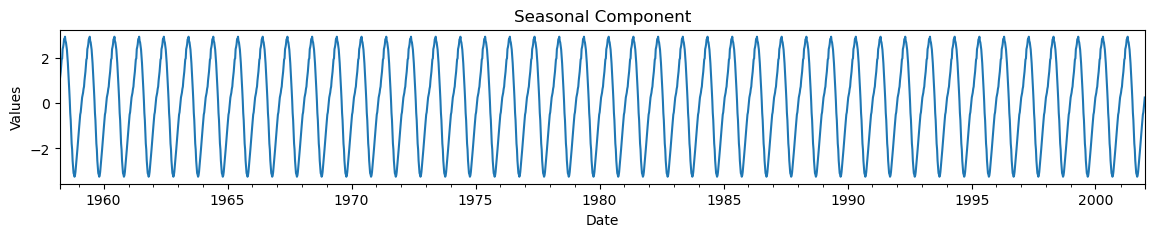

In [87]:
ax = descomp_seasonal.plot(figsize = (14,2))

ax.set_xlabel('Date')

ax.set_ylabel('Values')

ax.set_title('Seasonal Component')

plt.show()

In [88]:
descomp_resid = descomposition.resid

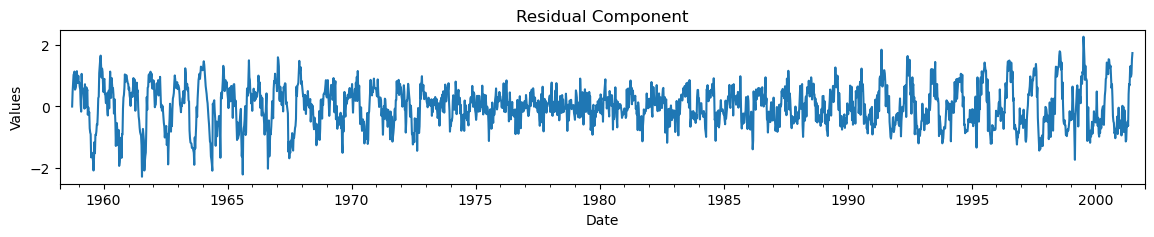

In [89]:
ax = descomp_resid.plot(figsize = (14,2))

ax.set_xlabel('Date')

ax.set_ylabel('Values')

ax.set_title('Residual Component')

plt.show()

# <a id="t6"></a>6. Plot multiple time series

### ```plt.subplots()```
`plt.subplots()` allows you to create a figure and one or more axes (subplots) within that figure. The number of rows and columns of subplots is controlled by the function arguments. For example, `plt.subplots(2,2)` creates a plot with two rows and two columns, allowing for four graphs on a single canvas. This is useful for creating multiple visualizations or comparing different datasets in one figure, all controlled from the main figure and its secondary axes.

In [90]:
ny_la = pd.read_csv("../data/ozone_nyla.csv", delimiter=",", parse_dates=["date"], index_col="date")
ny_la.head()

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


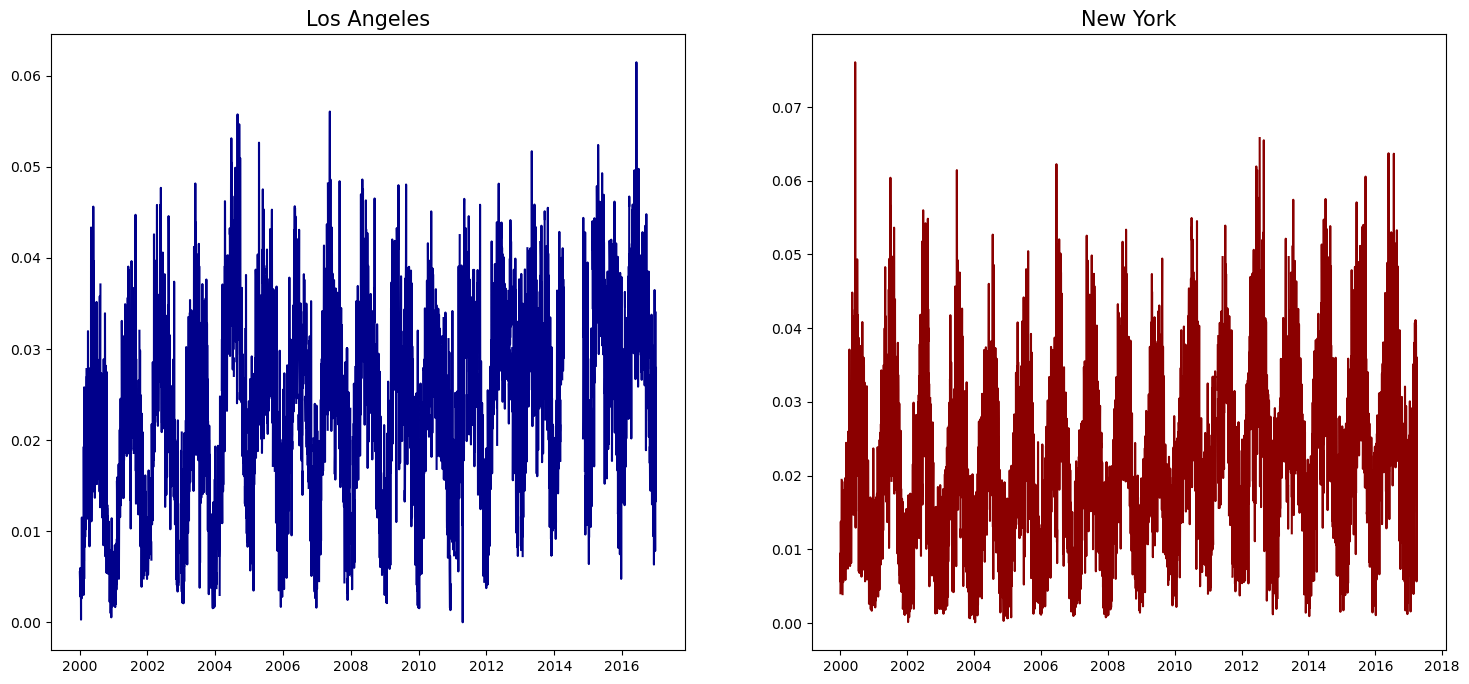

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].plot(ny_la.index, ny_la['Los Angeles'], label='Los Angeles', color='darkblue')
axs[0].set_title("Los Angeles", size=15)

axs[1].plot(ny_la.index, ny_la['New York'], label='Los Angeles', color='darkred')
axs[1].set_title("New York", size=15)

plt.show()

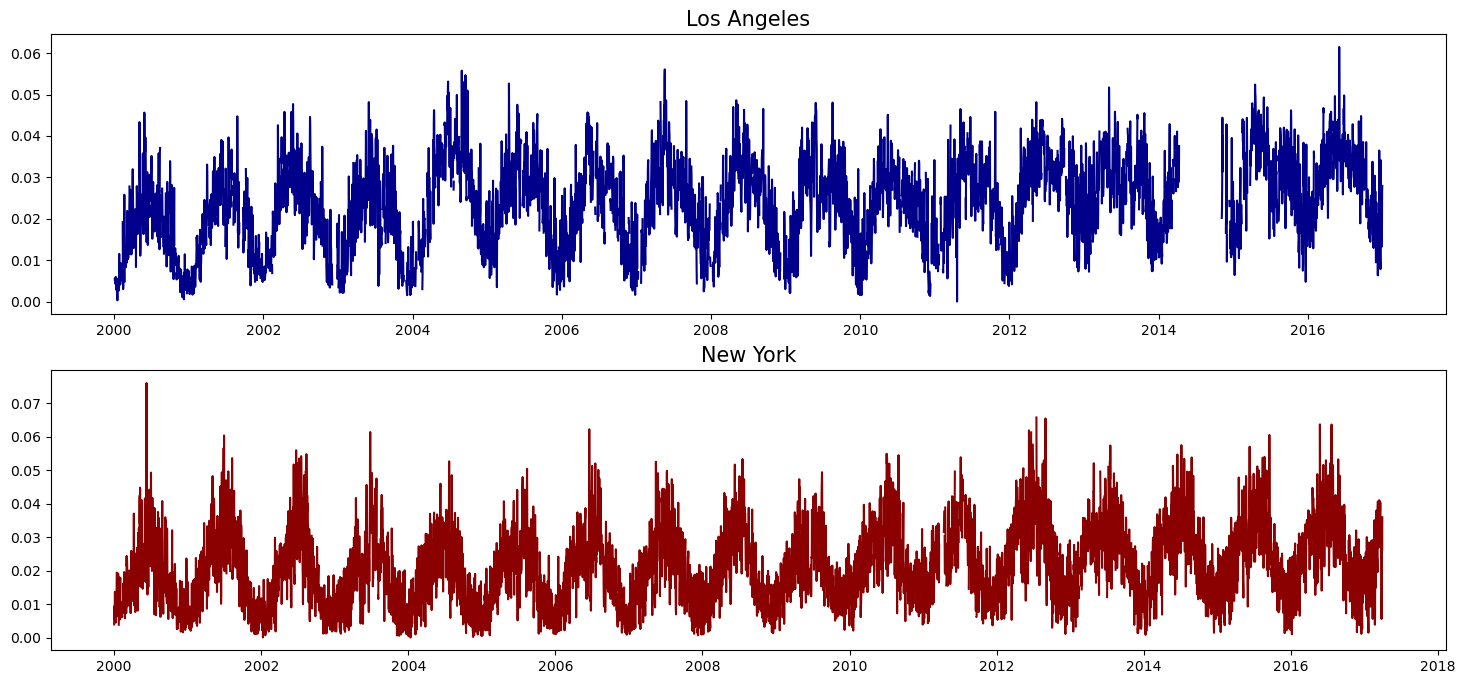

In [92]:
fig, axs = plt.subplots(2, 1, figsize=(18, 8))

axs[0].plot(ny_la.index, ny_la['Los Angeles'], label='Los Angeles', color='darkblue')
axs[0].set_title("Los Angeles", size=15)

axs[1].plot(ny_la.index, ny_la['New York'], label='Los Angeles', color='darkred')
axs[1].set_title("New York", size=15)

plt.show()

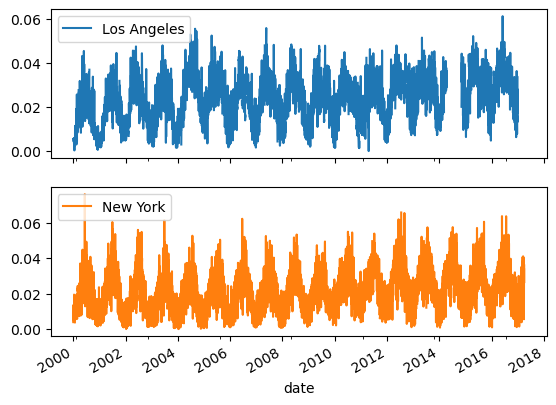

In [93]:
ny_la.plot(subplots=True)

plt.show()

### ```.twinx()```
We might want to plot data that shares the same dates on a single graph to identify correlations or patterns across multiple data series. However, when the data has very different scales, representing them together can make interpretation difficult. In such cases, we can use `ax.twinx()` to plot two different time series on the same axis. This function allows us to overlay two juxtaposed axes on a single plot, each with its own scale and range of values, making it easier to compare data series with different units or magnitudes.

In [94]:
cbi_ipc = pd.read_excel('../data/cbi_ipc.xlsx') 

In [95]:
cbi_ipc['Year'] = pd.to_datetime(cbi_ipc['Year'], format = "%Y") 

In [96]:
cbi_ipc = cbi_ipc.set_index('Year')

In [97]:
cbi_ipc.index

DatetimeIndex(['1980-01-01', '1980-01-01', '1980-01-01', '1980-01-01',
               '1981-01-01', '1981-01-01', '1981-01-01', '1981-01-01',
               '1982-01-01', '1982-01-01',
               ...
               '2018-01-01', '2018-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', length=164, freq=None)

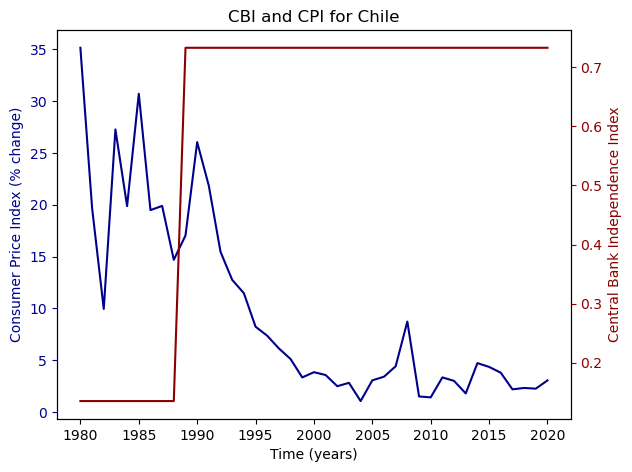

In [106]:
plt.style.use('default')

fig, ax = plt.subplots()

ax.set_title('CBI and CPI for Chile')

ax.plot(cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CPI, linewidth = 1.5, color = 'darkblue')

ax.set_xlabel('Time (years)')

ax.set_ylabel('Consumer Price Index (% change)', color = 'darkblue')

ax.tick_params('y', colors = 'darkblue')

ax2 = ax.twinx()

ax2.plot(cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CBI, linewidth = 1.5, color = 'darkred')

ax2.set_xlabel('Time (years)')

ax2.set_ylabel('Central Bank Independence Index', color = 'darkred')

ax2.tick_params('y', colors = 'darkred')

fig.tight_layout(pad=1.0)

plt.savefig("../images/CPI and CBI for Chile.png")

plt.show()

In [99]:
def graph_time_series(axes, x, y, color, xlabel, ylabel):
    """
    This function plots a time series, taking the axes, x-axis values, y-axis values, color, and axis labels as inputs.

    Arguments  :
        axes   : The axes being worked on
        x      : Dates for the x-axis (usually the index)
        y      : Values for the y-axis
        color  : Color of the axes
        xlabel : Label for the x-axis
        ylabel : Label for the y-axis
    """
    
    axes.plot(x, y, color = color)
    
    axes.set_xlabel(xlabel)
    
    axes.set_ylabel(ylabel, color = color)
    
    axes.tick_params(axis = 'y', colors = color)      

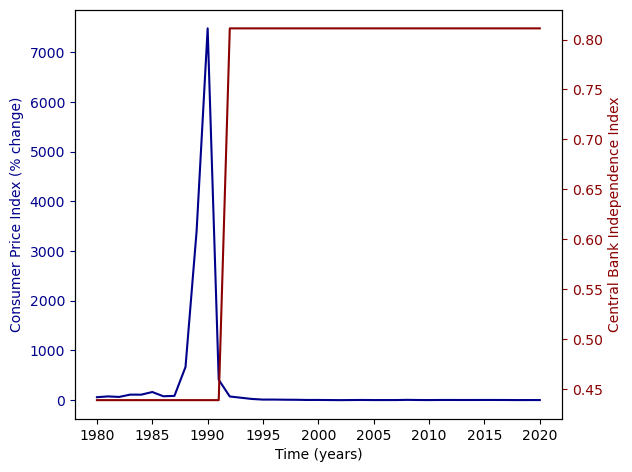

In [100]:
plt.style.use('default')

fig, ax = plt.subplots()

graph_time_series(ax, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CPI, 
                        "darkblue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graph_time_series(ax2, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CBI, 
                        "darkred", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("../images/CPI and CBI for Peru.png")

plt.show()

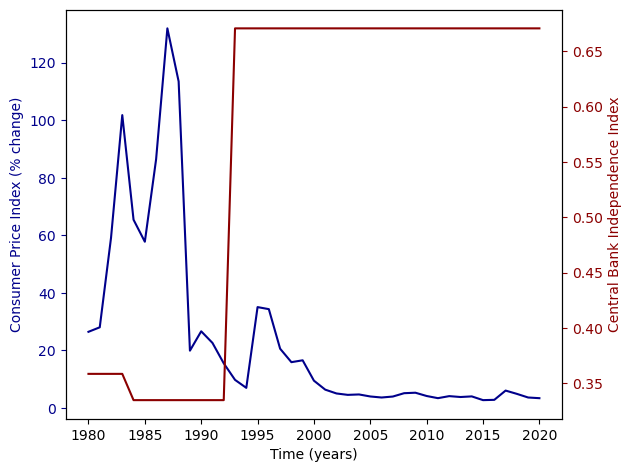

In [101]:
plt.style.use('default')

fig, ax = plt.subplots()

graph_time_series(ax, cbi_ipc[cbi_ipc["Country"] == "Mexico"].index, cbi_ipc[cbi_ipc["Country"] == "Mexico"].CPI, 
                        "darkblue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graph_time_series(ax2, cbi_ipc[cbi_ipc["Country"] == "Mexico"].index, cbi_ipc[cbi_ipc["Country"] == "Mexico"].CBI, 
                        "darkred", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("../images/CPI and CBI for Mexico.png")

plt.show()

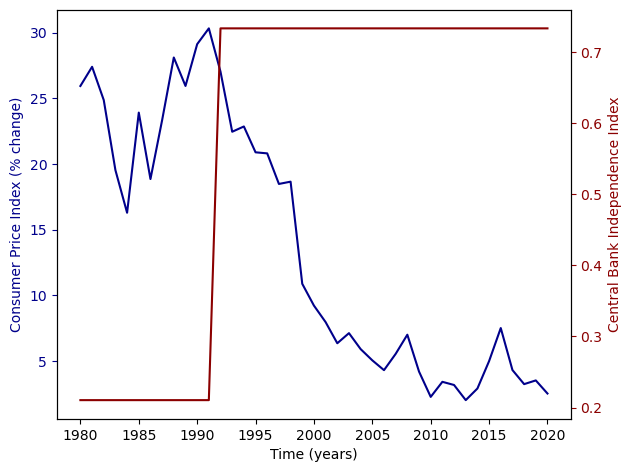

In [102]:
plt.style.use('default')

fig, ax = plt.subplots()

graph_time_series(ax, cbi_ipc[cbi_ipc["Country"] == "Colombia"].index, cbi_ipc[cbi_ipc["Country"] == "Colombia"].CPI, 
                        "darkblue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graph_time_series(ax2, cbi_ipc[cbi_ipc["Country"] == "Colombia"].index, cbi_ipc[cbi_ipc["Country"] == "Colombia"].CBI, 
                        "darkred", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("../images/CPI and CBI for Colombia.png")

plt.show()

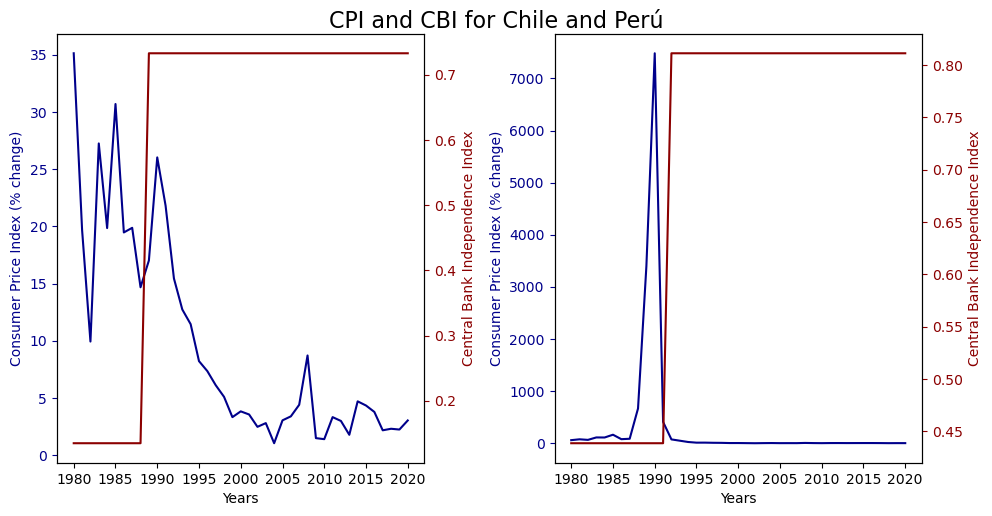

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

graph_time_series(axs[0], cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CPI, 
                        "darkblue", 'Years', 'Consumer Price Index (% change)')

ax1 = axs[0].twinx()

graph_time_series(ax1, cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CBI, 
                        "darkred", 'Years', 'Central Bank Independence Index')

graph_time_series(axs[1], cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CPI, 
                        "darkblue", 'Years', 'Consumer Price Index (% change)')

ax2 = axs[1].twinx()

graph_time_series(ax2, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CBI, 
                        "darkred", 'Years', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)
fig.suptitle('CPI and CBI for Chile and Perú', y=1.02 , fontsize=16)

plt.savefig("../images/CBI_IPC.png", bbox_inches='tight', dpi=300)

In [104]:
end = time.time()
timelapse = end - start
timelapse

55.35024690628052